In [1]:
%pylab inline
import datetime
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_data(name):
    data = []
    for line in open(name, 'r'):
        spl = line.split('|')
        date, users = datetime.datetime.strptime(spl[1].strip(), "%Y-%m-%d"), int(spl[3].split(' ')[1].replace(',', ''))
        data.append([date, users])

    return array(data)

In [3]:
def plot_data(data, legend = None):
    plot(range(len(data)), data[:,1], label = legend)
    xticks(range(len(data)), [x.strftime("%d-%m") for x in data[:,0]],  rotation=70)

In [4]:
DATA_DIR = 'data/'
dirs = listdir(DATA_DIR)
dirs

['15-05', '09-04']

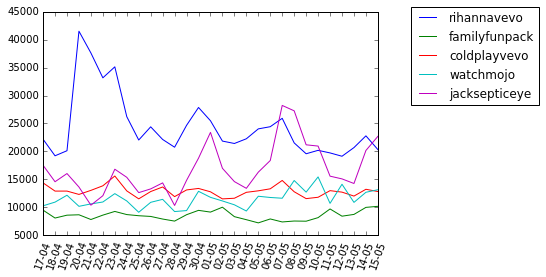

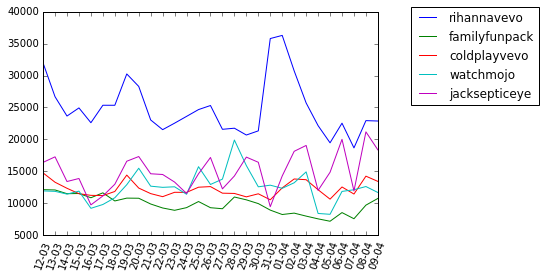

In [26]:
convert_dir = lambda _dir: DATA_DIR + _dir + '/'
contents = lambda _dir: set(listdir(convert_dir(_dir)))

names = ['rihannavevo', 'familyfunpack', 'coldplayvevo', 'watchmojo', 'jacksepticeye']
# list(contents(dirs[0]) & contents(dirs[1]))[:5]
data = {}
for name in names:
    data[name] = []
for _dir in dirs:
    directory = convert_dir(_dir)
    for name in names:
        datum = read_data(directory + name)
        plot_data(datum, legend=name)
        data[name].append(datum)
    legend(bbox_to_anchor=(1.5, 1.05))
    show()

In [ ]:
#TODO: normalize data!

In [90]:
import lasagne
import theano
import theano.tensor as T

In [81]:
def normalize(arr):
    a = []
    arr = list(map(lambda x: x[1], arr))
    arr = list(zip(*[arr[i:] for i in range(4)]))
    for i in range(len(arr)):
        a.append(((i,) + (arr[i][:-1]), arr[i][-1]))
    return a

In [82]:
training, test = map(normalize, data['coldplayvevo'])

In [138]:
input_var = T.row('X', dtype='int64')
target_var = T.vector('y', dtype='int64')

In [139]:
l_in = lasagne.layers.InputLayer((1, 4), input_var)

In [158]:
network = lasagne.layers.DenseLayer(lasagne.layers.dropout(l_in, 0.5),
                                    4,
                                    W=lasagne.init.Orthogonal())
network = lasagne.layers.DenseLayer(lasagne.layers.dropout(l_in, 0.5),
                                    1,
                                    W=lasagne.init.Orthogonal())

In [159]:
# create loss function
prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.squared_error(prediction, target_var)
loss = loss.mean() + 1e-4 * lasagne.regularization.regularize_network_params(
        network, lasagne.regularization.l2)

# create parameter update expressions
params = lasagne.layers.get_all_params(network, trainable=True)
updates = lasagne.updates.nesterov_momentum(loss, params, learning_rate=0.01,
                                            momentum=0.9)

# compile training function that updates parameters and returns training loss
train_fn = theano.function([input_var, target_var], loss, updates=updates)

In [160]:
for epoch in range(100):
    loss = 0
    for input_batch, target_batch in training:
        input_batch = array(input_batch)[None, :]
        target_batch= array([target_batch])
        loss += train_fn(input_batch, target_batch)
    print("Epoch %d: Loss %g" % (epoch + 1, loss / len(training)))

Epoch 1: Loss 3.69846e+08
Epoch 2: Loss 1.67891e+08
Epoch 3: Loss 1.68162e+08
Epoch 4: Loss 1.68177e+08
Epoch 5: Loss 1.68175e+08
Epoch 6: Loss 1.68171e+08
Epoch 7: Loss 1.68168e+08
Epoch 8: Loss 1.68164e+08
Epoch 9: Loss 1.68161e+08
Epoch 10: Loss 1.68157e+08
Epoch 11: Loss 1.68154e+08
Epoch 12: Loss 1.6815e+08
Epoch 13: Loss 1.68147e+08
Epoch 14: Loss 1.68143e+08
Epoch 15: Loss 1.6814e+08
Epoch 16: Loss 1.68136e+08
Epoch 17: Loss 1.68133e+08
Epoch 18: Loss 1.68129e+08
Epoch 19: Loss 1.68126e+08
Epoch 20: Loss 1.68122e+08
Epoch 21: Loss 1.68119e+08
Epoch 22: Loss 1.68115e+08
Epoch 23: Loss 1.68112e+08
Epoch 24: Loss 1.68108e+08
Epoch 25: Loss 1.68105e+08
Epoch 26: Loss 1.68101e+08
Epoch 27: Loss 1.68098e+08
Epoch 28: Loss 1.68094e+08
Epoch 29: Loss 1.68091e+08
Epoch 30: Loss 1.68088e+08
Epoch 31: Loss 1.68084e+08
Epoch 32: Loss 1.68081e+08
Epoch 33: Loss 1.68077e+08
Epoch 34: Loss 1.68074e+08
Epoch 35: Loss 1.6807e+08
Epoch 36: Loss 1.68067e+08
Epoch 37: Loss 1.68064e+08
Epoch 38: Los

In [163]:
test_prediction = lasagne.layers.get_output(network, deterministic=True)
predict_fn = theano.function([input_var],test_prediction)
print("Predicted class for first test input: %r" % predict_fn(array(test[][0])[None, :]))

Predicted class for first test input: array([[ -3.09228199e-11]])
